In [1]:
import pandas as analytics
import numpy as maths
import matplotlib.pyplot as graph
import os
from math import exp , log, log10

In [2]:
os.chdir('../dependencies/')
from logistic_regression import logistic_regression

In [3]:
def loss(f_x,y):
    if y == 1 : return y*log(abs(f_x))
    else : return (1-y)*log(abs(1-f_x))
    

In [4]:
def plot_graph(name,var):
    figure = graph.figure(figsize = (15,10))
    graph.ylabel(name)
    graph.xlabel("Iterations")
    graph.title(name)
    graph.plot(var,label=name)
    graph.legend()
    graph.grid(True)
    

In [5]:
def norm(vector):
    vector = [v**2 for v in vector]
    vector = float(sum(vector))
    vector = vector ** 0.5
    return vector

# def sigmoid(x,w):
#     f_x = 1/(1 + exp(-float(maths.matmul(w.T,x)))) 
#     return f_x

def logit(f_x):
    if f_x == 1: return 0
    if f_x == 0: return 1
    else : return log(abs(f_x)/abs(1-f_x))

In [6]:
def create_confusion_matrix(y,y_hat):
    """ Creating the confusion matrix """

    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(y)):
        if y[i] == y_hat[i] == 1:
            tp = tp + 1
        elif y[i] == y_hat[i] == 0:
            tn = tn + 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn = fn + 1
        else :
            fp = fp + 1

    confusion_matrix = {'tp':tp,'tn':tn,'fp':fp,'fn':fn}
    print("Confusion Matrix : ",confusion_matrix)
    accuracy = round((confusion_matrix['tp']+confusion_matrix['tn'])/(confusion_matrix['tp'] + confusion_matrix['tn'] + confusion_matrix['fp'] + confusion_matrix['fn'])*100,2)
    precision = round((confusion_matrix['tp'])/(confusion_matrix['fp']+confusion_matrix['tp'])*100,2) 
    sensitivity = round((confusion_matrix['tp'])/(confusion_matrix['tp']+confusion_matrix['fn'])*100,2)
    specificity = round((confusion_matrix['tn'])/(confusion_matrix['fp']+confusion_matrix['tn'])*100,2)

    
    print('Accuracy : ', accuracy)
    print('Precision : ', precision)
    print('Senstivity : ', sensitivity)
    print('Specificity : ', specificity)
    
#     accuracy = find_accuracy()
#     precision = find_precision()
#     sensitivity = find_sensitivity()
#     specificity = find_specificity()
#     fscore = find_fscore()


def find_precision(show = True):
    """ Finding Precision """

    confusion_matrix = confusion_matrix
    precision = round((confusion_matrix['tp'])/(confusion_matrix['fp']+confusion_matrix['tp'])*100,2) 
    if show : print("Precision : ",precision,"%")
    return precision

def find_accuracy(show = True):
    """ Finding Accuracy """

    confusion_matrix = confusion_matrix
    accuracy = round((confusion_matrix['tp']+confusion_matrix['tn'])/(confusion_matrix['tp'] + confusion_matrix['tn'] + confusion_matrix['fp'] + confusion_matrix['fn'])*100,2)
    if show : print("Accuracy : ",accuracy,"%")
    return accuracy

def find_sensitivity(show = True):
    """ Finding Sensivity """

    confusion_matrix = confusion_matrix
    sensitivity = round((confusion_matrix['tp'])/(confusion_matrix['tp']+confusion_matrix['fn'])*100,2)
    if show : print("Sensivity : ",sensitivity,"%")
    return sensitivity

def find_specificity(show = True):
    """ Finding Specificity """

    confusion_matrix = confusion_matrix
    specificity = round((confusion_matrix['tn'])/(confusion_matrix['fp']+confusion_matrix['tn'])*100,2)
    if show : print("Specificity : ",specificity,"%")
    return specificity

def find_fscore(show=True):
    """ Finding FScore """

    confusion_matrix = confusion_matrix
    f_score = round(2/((1/find_precision(False))+(1/find_sensitivity(False))),2)
    if show : print("F1 Score : ",f_score)
    return f_score        


In [7]:
filename = 'data1'
validation_perc = 0.7
training_perc = 0.8
alphas = maths.arange(0,1,0.1)
number_of_iterations = 10
training_perc = 0.7

In [8]:
log_reg = logistic_regression()
log_reg.load_data(filename)
df_validation, df_test = log_reg.split_dataset(validation_perc , training_perc)
# log_reg.find_weights(alphas, number_of_iterations )
# log_reg.classify(df_test)

In [9]:
df_validation = df_validation.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [10]:
for col in df_validation.columns[1:-1] :
    maximum = max(df_validation[col])
    minimum = min(df_validation[col])
    diff = maximum - minimum
    
    df_validation[col] = (df_validation[col] - maximum) / diff
    df_test[col] = (df_test[col] - maximum) / diff
df_validation

,x0,x1,x2,y
0,1,-0.541667,-0.918367,0
1,1,0.000000,-0.244898,0
2,1,-0.854167,-0.795918,1
3,1,-0.229167,-0.306122,0
4,1,-0.958333,-0.204082,1
...,...,...,...,...
135,1,-0.645833,-0.346939,1
136,1,-0.895833,-0.918367,0
137,1,-0.020833,-0.367347,0
138,1,-0.875000,-0.061224,1


In [11]:
def sigmoid(x,w):
    return 1/(1 + exp(-float(w.T@x)))

In [12]:
def liklihood(x,y,w):
    y_hat = sigmoid(x,w)
    if y_hat == 1: return y*log(y_hat)
    else : return y*log(abs(y_hat)) + (1-y)*log(abs(1-y_hat))

In [13]:
def norm(z):
    z = list(z)
    return float(sum([z**2 for z in z]))**0.5

In [14]:
def logit(x,w):
    f_x = sigmoid(x,w)
    if f_x == 1 : return 1
    elif f_x == 0 : return 0 
    else : return log(abs(f_x/(1-f_x)))
    

In [15]:
df_validation = df_validation.sample(frac=1)
X = df_validation.iloc[:,:-1].reset_index(drop=True)
Y = df_validation.iloc[:,-1].reset_index(drop=True)

epsilons = 1e-3
w_stars = {}
meta_norms = {}
meta_liklihoods = {}
alphas = maths.arange(0,1,0.1)

for alpha in alphas:
    w_star = maths.matrix(maths.random.rand(X.shape[1])).T
    
    w_old = w_star + [1]
    
    
    epsilon = 1e-3
    # alpha = 0.1
    liklihoods = []
    # sigmoids = []
    weights = []
    norms = []
    
    while norm(w_star - w_old) > epsilon :
        
        w_old = w_star
        loss = []
    
        for i in range(len(X)):
            x = maths.matrix(X.iloc[i]).T
            y = Y.iloc[i]
            y_hat = sigmoid(x,w_star)
            w_star = w_star + alpha * (y - y_hat) * x
            loss.append(liklihood(x,y,w_star))
        
        weights.append(w_star.T)
        # sigmoids.append(y_hat)
        norms.append(norm( w_star - w_old ))
        liklihoods.append(sum(loss))

    w_stars.update({epsilon:w_star})
    meta_norms.update({epsilon:norms})
    meta_liklihoods.update({epsilon:liklihoods})
    
    print(w_star)

[[0.25655205]
 [0.14362037]
 [0.04558489]]
[[ -18.15202456]
 [-132.79924075]
 [ 115.40125834]]
[[ -31.13713691]
 [-230.96513478]
 [ 203.27121389]]
[[ -39.79740707]
 [-296.67878745]
 [ 262.04179511]]
[[ -45.93733635]
 [-343.28138459]
 [ 303.6706679 ]]
[[ -50.7245758 ]
 [-379.63202866]
 [ 336.12158638]]
[[ -54.66607793]
 [-409.57463435]
 [ 362.84252275]]
[[ -58.02564383]
 [-435.10821192]
 [ 385.62404313]]


KeyboardInterrupt: 

(array([4.8255e+04, 1.7000e+01, 5.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([9.99991873e-04, 1.58082738e-01, 3.15165484e-01, 4.72248231e-01,
        6.29330977e-01, 7.86413723e-01, 9.43496469e-01, 1.10057922e+00,
        1.25766196e+00, 1.41474471e+00, 1.57182745e+00]),
 <BarContainer object of 10 artists>)

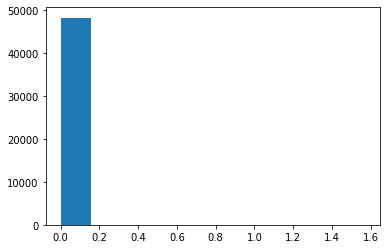

In [17]:
graph.hist(norms)

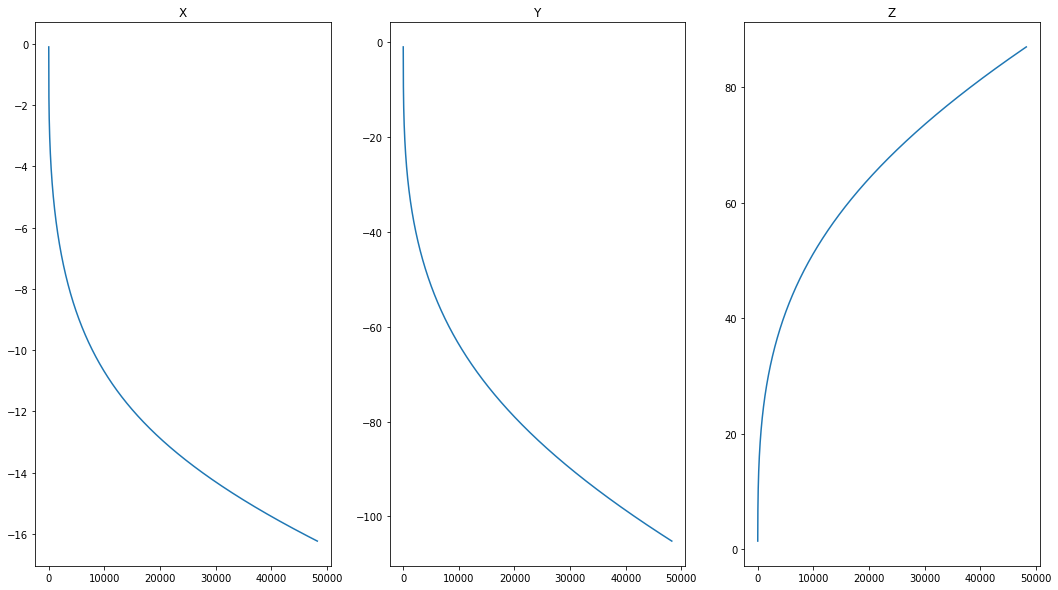

In [18]:
x = [float(weight.T[0]) for weight in weights]
y = [float(weight.T[1]) for weight in weights]
z = [float(weight.T[2]) for weight in weights]

figure = graph.figure(figsize=(18,10))

graph.subplot(1,3,1)
graph.plot(x)
graph.title('X')

graph.subplot(1,3,2)
graph.plot(y)
graph.title('Y')

graph.subplot(1,3,3)
graph.plot(z)
graph.title('Z')

graph.show()

In [19]:
liklihoods[-1] == max(liklihoods)

True

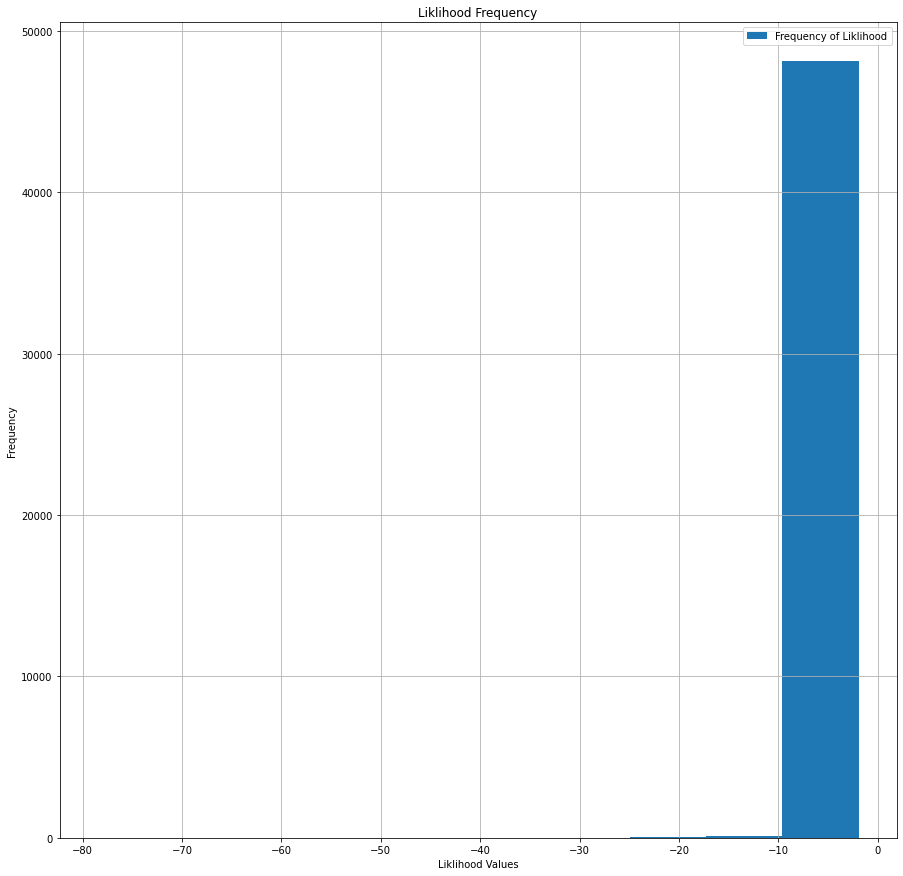

In [20]:
figure = graph.figure(figsize=(15,15))
graph.hist(liklihoods,label = 'Frequency of Liklihood')
graph.legend()
graph.title("Liklihood Frequency")
graph.grid()
graph.xlabel("Liklihood Values")
graph.ylabel("Frequency")
graph.show()

In [21]:
figure = graph.figure(figsize=(15,15))
graph.scatter(sigmoids,liklihoods,c = 'blue',label = 'Liklihood',alpha = 0.1)
graph.legend()
graph.title("Liklihood vs Sigmoid")
graph.grid()
graph.xlabel("Sigmoid")
graph.ylabel("Liklihood")
graph.show()

NameError: name 'sigmoids' is not defined

<Figure size 1080x1080 with 0 Axes>

In [ ]:
graph.title("Liklihood")
graph.plot(liklihoods)

In [ ]:
graph.title("Norms")
graph.plot(norms)

In [ ]:
threshold = 0.5

In [ ]:
X = df_test.iloc[:,:-1]
Y = df_test.iloc[:,-1]
y_hat = []
dbs = []

for i in range(len(df_test)):
    x = X.iloc[i]
    y = Y.iloc[i]
    y_hat.append(logit(x,w_star))
    dbs.append(w_star.T@x)

y_hat = [1 if y > threshold else 0 for y in y_hat]
df_test['y_hat'] = y_hat

In [ ]:
figure = graph.figure(figsize=(15,15))
graph.scatter([i for i in range(len(df_test['y']))],df_test['y'],alpha = 0.8,color = 'yellow')
graph.scatter([i for i in range(len(df_test['y_hat']))],df_test['y_hat'], alpha = 0.5, edgecolor = 'red',color = 'yellow')
graph.grid(True)
# graph.plot(dbs)

In [ ]:
w_star

In [ ]:
create_confusion_matrix(df_test['y'],df_test['y_hat'])

In [ ]:
norms_copy = norms.copy()

In [ ]:
figure = graph.figure(figsize=(20,15))
graph.plot(norms,label = 'Norms')
# graph.scatter(norms.index(maths.median(norms)),maths.median(norms),color = 'red', marker = 'x' , label = 'Median')
# graph.scatter(norms.index(maths.mean(norms)),maths.mean(norms),color = 'red', marker = 'x' , label = 'Mean')
graph.grid(True)
graph.legend()
graph.xlim(500)
graph.ylim(0,0.020)
graph.show()
graph.ion()

In [ ]:
min(norms)